In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MaxAbsScaler

C:\ProgramData\anaconda\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
# load the bag of words dataset

data = pd.read_csv("bag_of_words.csv")

data.head()

,advice,cab,decker,etis,eurobond,halligan,keen,pvr,refundable,soda
0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# set up the scaler
scaler = MaxAbsScaler()

# fit the scaler to the data, it will learn the parameters
scaler.fit(data)

# transform data
data_scaled = scaler.transform(data)

In [5]:
# the scaler stores the maximum values of the features as learned from train set
scaler.max_abs_

array([ 7.,  6.,  2.,  2., 11.,  4.,  3.,  6., 52.,  2.])

In [6]:
# let's transform the returned NumPy array to dataframe

data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

data_scaled.head()

,advice,cab,decker,etis,eurobond,halligan,keen,pvr,refundable,soda
0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.142857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.019231,0.0
4,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [7]:
# Inspect the original value statistics

data.describe()

,advice,cab,decker,etis,eurobond,halligan,keen,pvr,refundable,soda
count,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000
mean,0.427954,0.008646,0.007925,0.007925,0.219020,0.072767,0.009366,0.177954,2.336455,0.007925
std,0.940093,0.227675,0.110426,0.103691,0.695758,0.394309,0.144294,0.581526,6.151411,0.096488
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
max,7.000000,6.000000,2.000000,2.000000,11.000000,4.000000,3.000000,6.000000,52.000000,2.000000


In [8]:
# inspect the values after scaling

data_scaled.describe()

,advice,cab,decker,etis,eurobond,halligan,keen,pvr,refundable,soda
count,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000
mean,0.061136,0.001441,0.003963,0.003963,0.019911,0.018192,0.003122,0.029659,0.044932,0.003963
std,0.134299,0.037946,0.055213,0.051846,0.063251,0.098577,0.048098,0.096921,0.118296,0.048244
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019231,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.038462,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


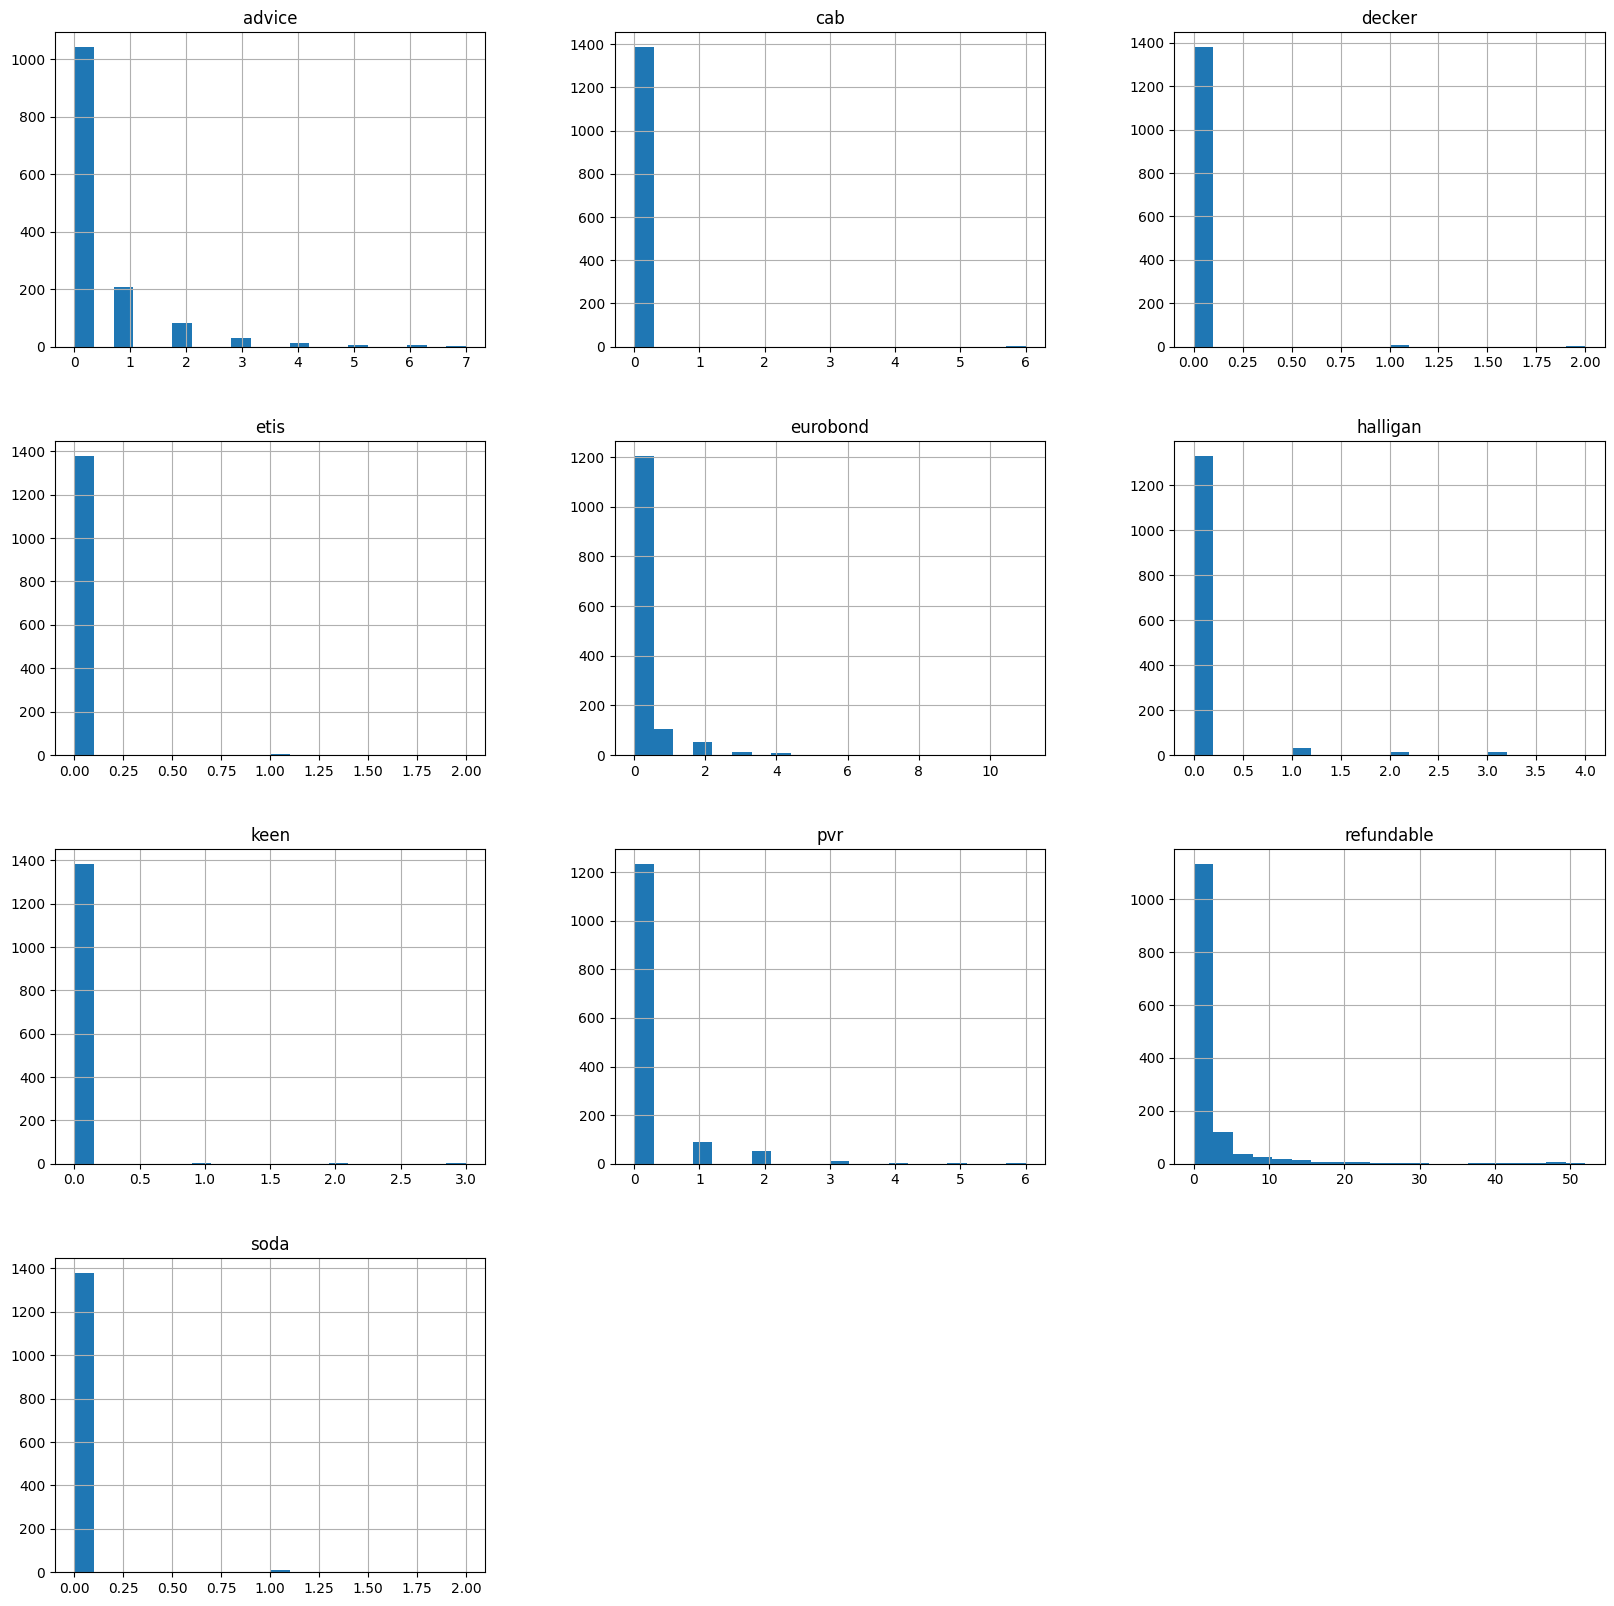

In [9]:
data.hist(bins=20, figsize=(20, 20))
plt.show()

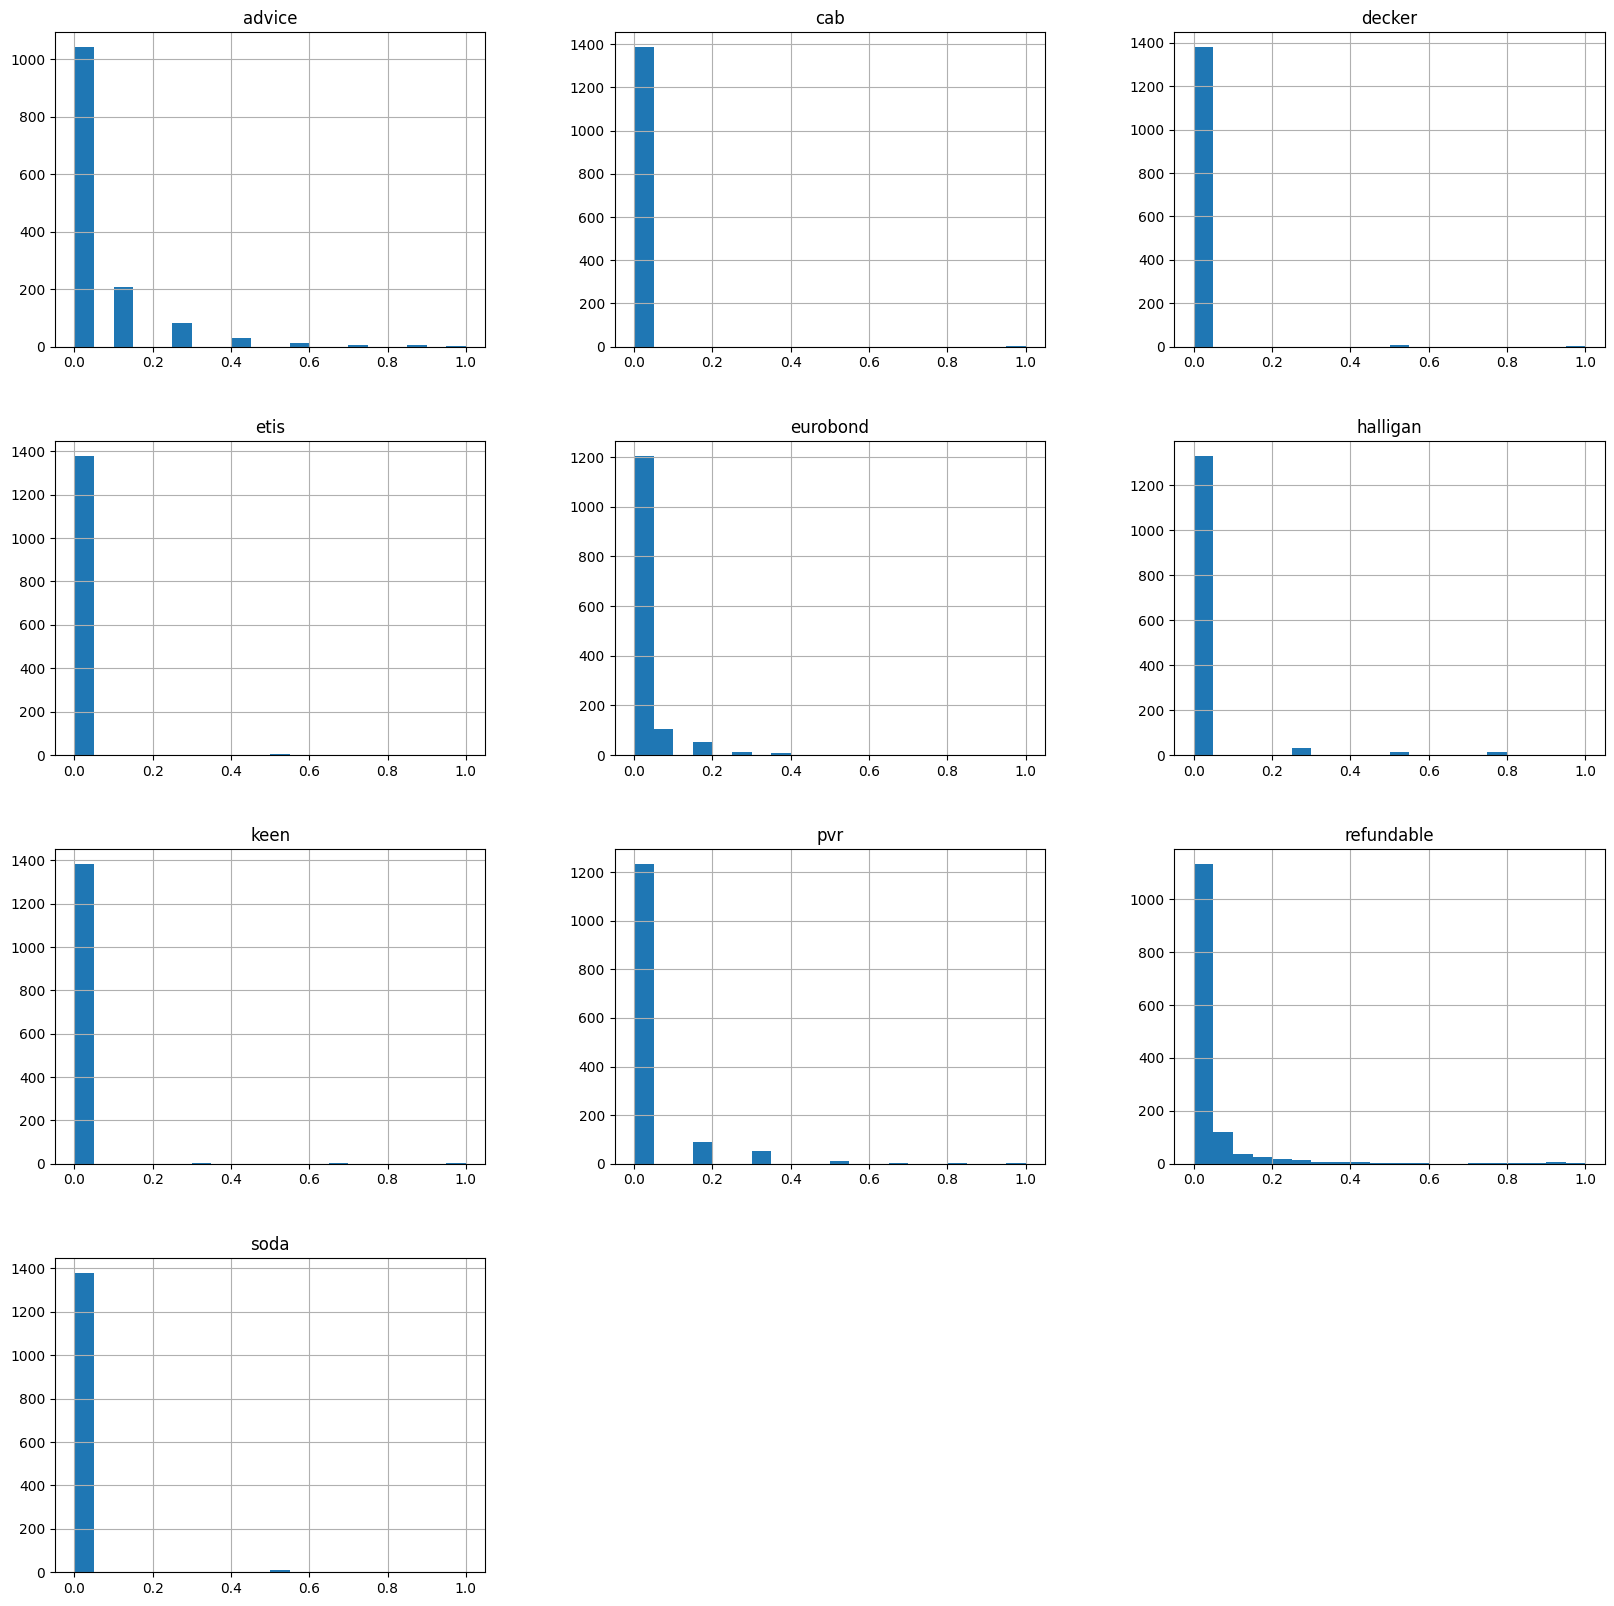

In [10]:
data_scaled.hist(bins=20, figsize=(20, 20))
plt.show()

In [11]:
# 底下的實例先對樣本進行對0的中心化然後再以最大值調整
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MaxAbsScaler, StandardScaler

In [12]:
# load the California House price data from Scikit-learn
X, y = fetch_california_housing(return_X_y=True, as_frame=True)
X.drop(labels=["Latitude", "Longitude"], axis=1, inplace=True)

# display top 5 rows
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467


In [13]:
# let's separate the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0,
)

X_train.shape, X_test.shape

((14448, 6), (6192, 6))

In [14]:
# set up the StandardScaler so that it removes the mean
# but does not divide by the standard deviation
scaler_mean = StandardScaler(with_mean=True, with_std=False)

# set up the MaxAbsScaler normally
scaler_maxabs = MaxAbsScaler()

# fit the scalers to the train set, it will learn the parameters
scaler_mean.fit(X_train)
scaler_maxabs.fit(scaler_mean.transform(X_train))

# transform train and test sets
X_train_scaled = scaler_maxabs.transform(scaler_mean.transform(X_train))
X_test_scaled = scaler_maxabs.transform(scaler_mean.transform(X_test))

In [15]:
# let's transform the returned NumPy arrays to dataframes for the rest of
# the demo

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [16]:
# Inspect the original value statistics
X_test.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
count,6192.000000,6192.000000,6192.000000,6192.000000,6192.000000,6192.000000
mean,3.880013,28.687984,5.442057,1.101109,1426.222061,3.140976
std,1.920007,12.560416,2.862733,0.519956,1091.567168,15.796292
min,0.499900,1.000000,1.465753,0.500000,8.000000,0.692308
25%,2.552150,18.000000,4.414452,1.006494,796.000000,2.436452
50%,3.529600,29.000000,5.227365,1.048741,1169.500000,2.825041
75%,4.768750,37.000000,6.064257,1.098434,1727.250000,3.285501
max,15.000100,52.000000,141.909091,25.636364,16305.000000,1243.333333


In [17]:
# inspect the values after scaling

X_test_scaled.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
count,6192.000000,6192.000000,6192.000000,6192.000000,6192.000000,6192.000000
mean,0.001199,0.002509,0.000147,0.000192,0.000031,0.000168
std,0.172454,0.454779,0.022522,0.015770,0.031864,0.026474
min,-0.302402,-1.000000,-0.031136,-0.018039,-0.041369,-0.003936
25%,-0.118069,-0.384475,-0.007938,-0.002677,-0.018366,-0.001012
50%,-0.030275,0.013806,-0.001542,-0.001396,-0.007463,-0.000361
75%,0.081025,0.303465,0.005042,0.000111,0.008818,0.000411
max,1.000000,0.846575,1.073761,0.744318,0.434361,2.078678


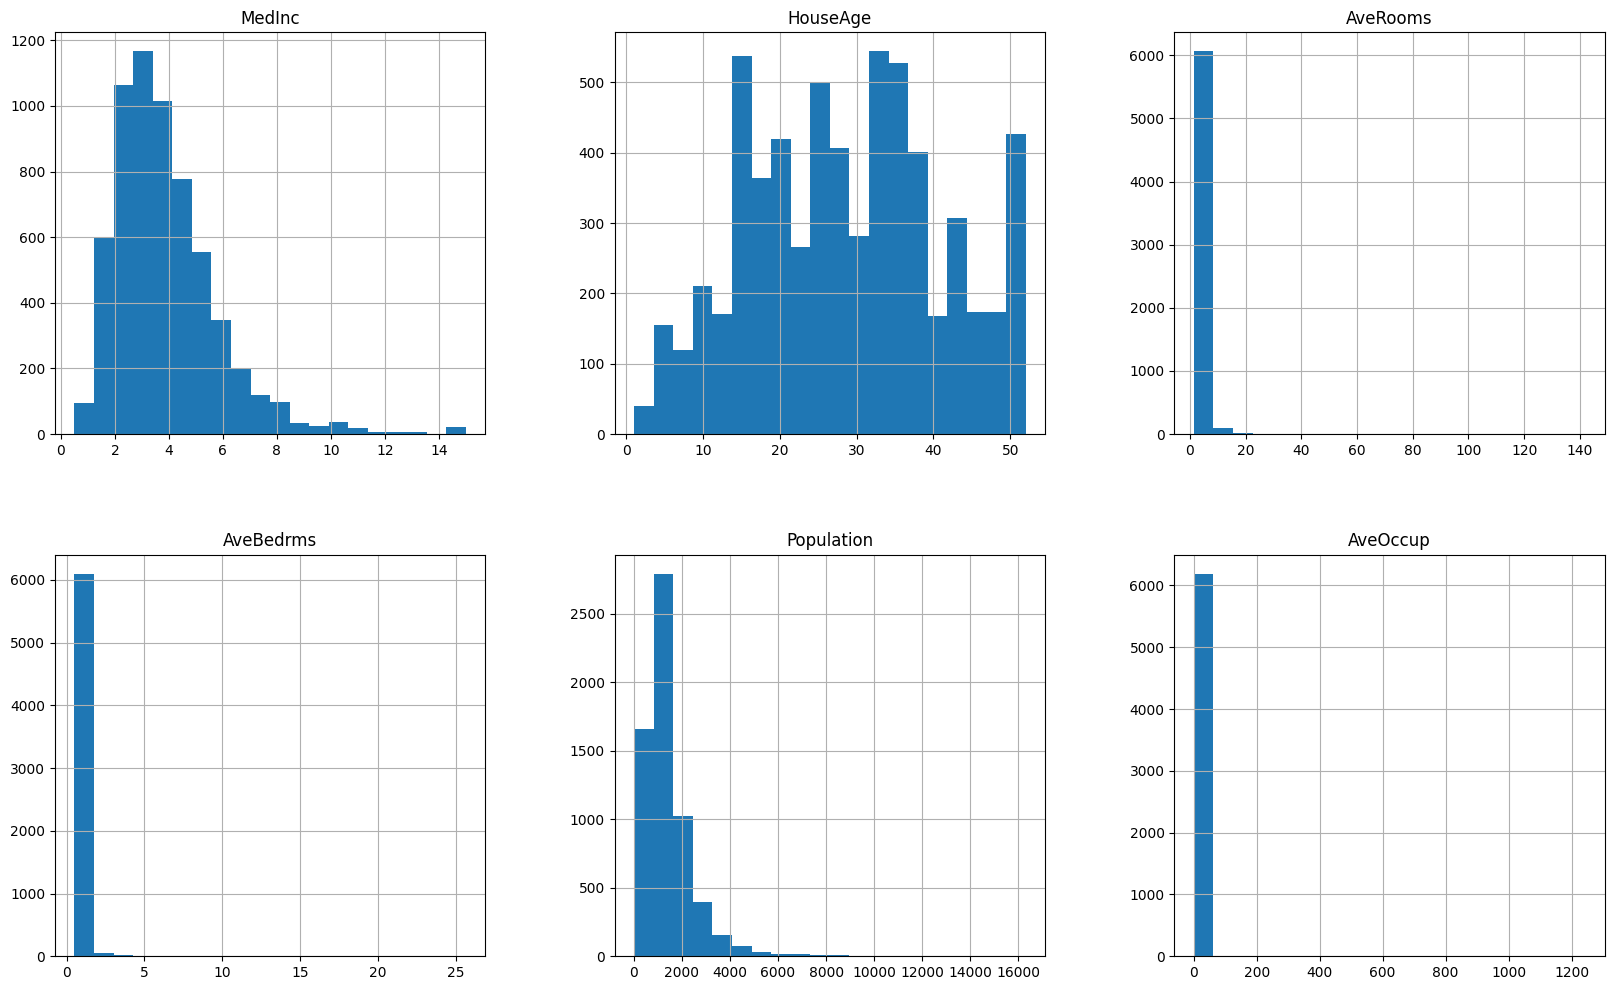

In [18]:
X_test.hist(bins=20, figsize=(20, 12), layout=(2, 3))
plt.show()

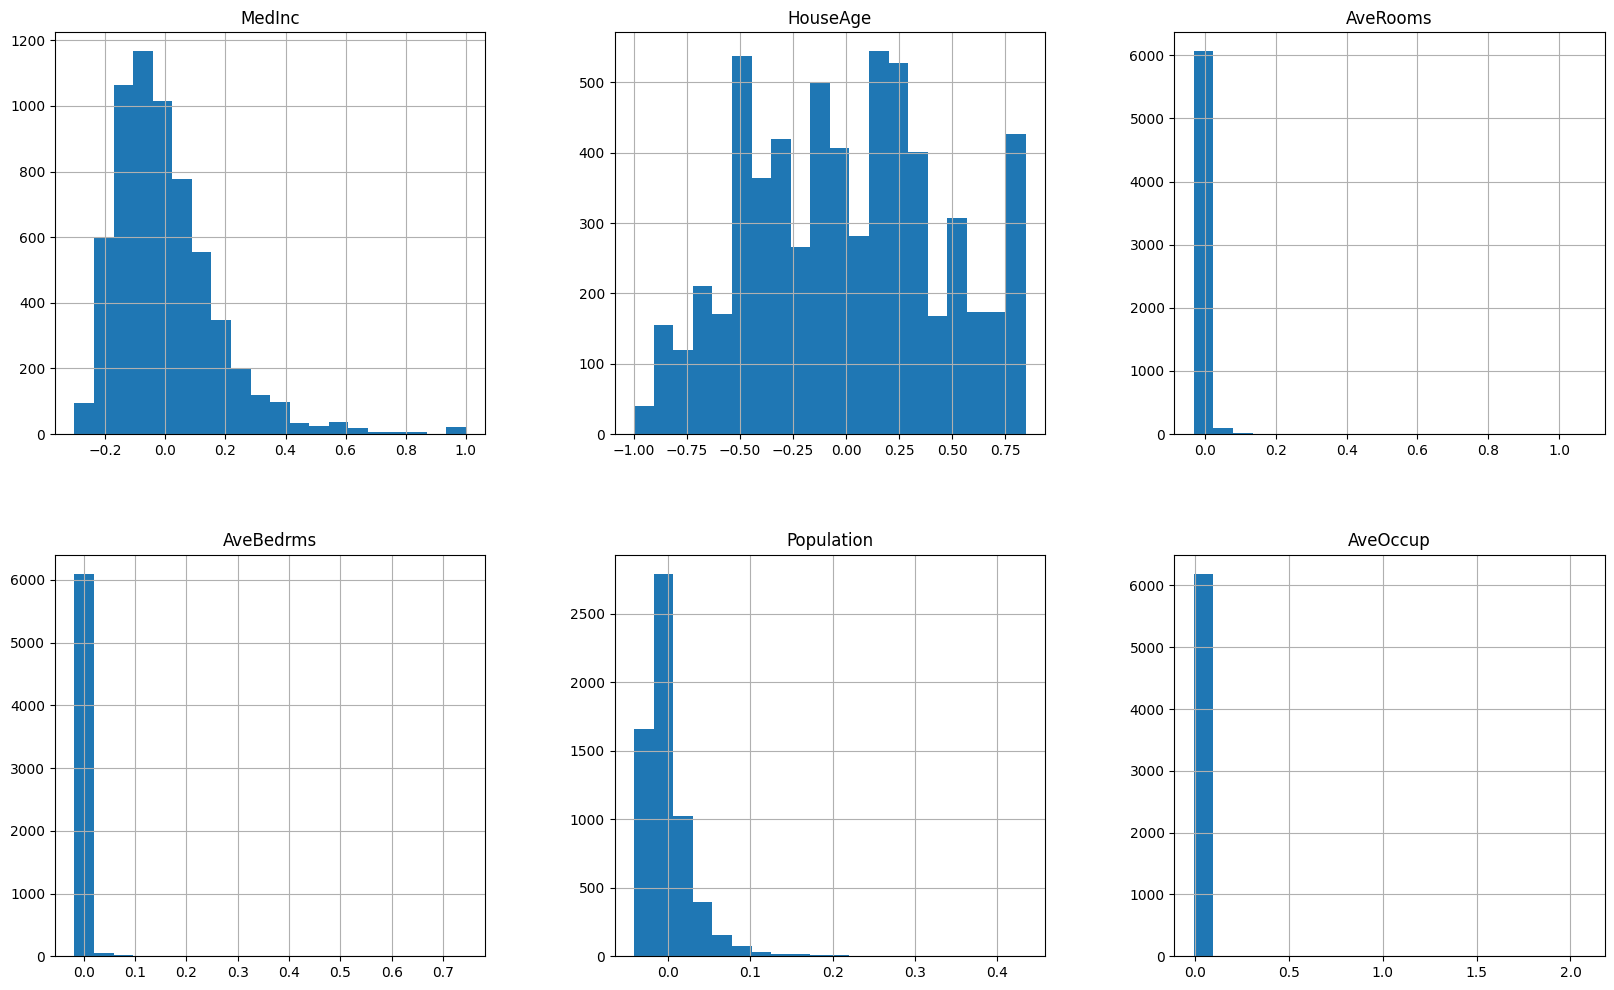

In [19]:
X_test_scaled.hist(bins=20, figsize=(20, 12), layout=(2, 3))
plt.show()